In [2]:
# Importing Libraries
import pandas as pd #pandas: For loading and manipulating the dataset.
import matplotlib.pyplot as plt #matplotlib.pyplot and seaborn: For creating visualizations to understand the data.
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [4]:
file_path = "mcdonalds.csv"
df = pd.read_csv(file_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
#Step 2: Data Cleaning and Transformation
print(df.isnull().sum())


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [8]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':  # Check for categorical columns
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store the encoder for future use

In [9]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


C:\Users\Rahul Kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


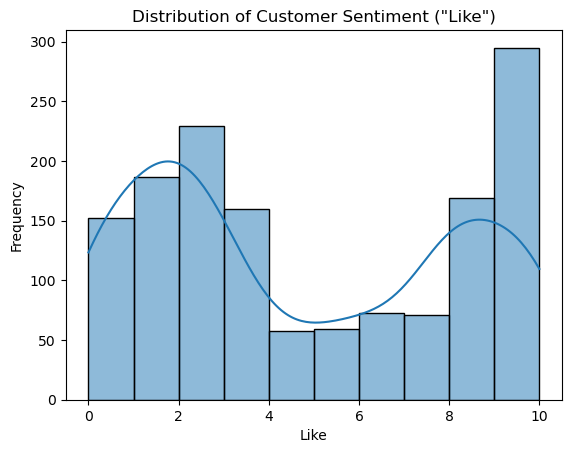

In [10]:
#Step 3: Exploratory Data Analysis (EDA)
# Visualize the distribution of the 'Like' column
sns.histplot(df['Like'], bins=10, kde=True)
plt.title('Distribution of Customer Sentiment ("Like")')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.show()


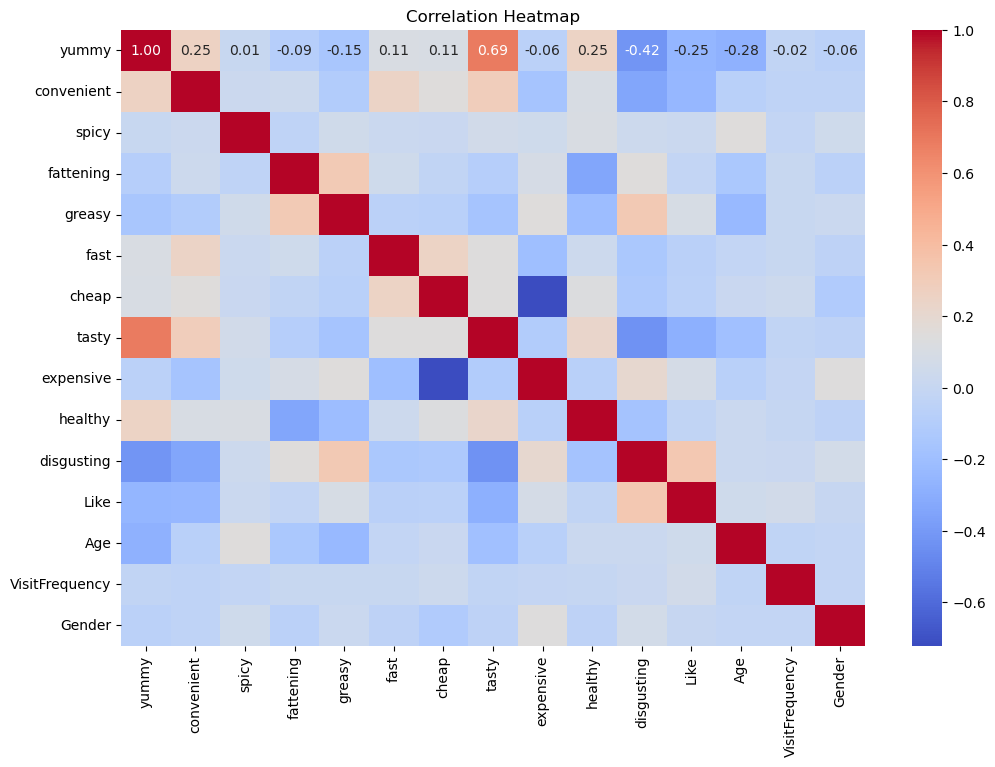

In [11]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
#Step 4: Clustering Using K-Means
# Drop non-relevant columns for clustering
attribute_columns = [col for col in df.columns if col not in ['Age', 'Gender', 'Like', 'VisitFrequency']]
X = df[attribute_columns]




C:\Users\Rahul Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rahul Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


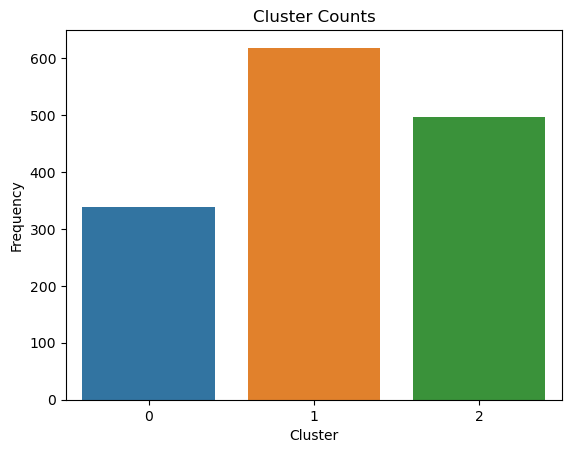

In [14]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
# Visualize the distribution of clusters
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

In [15]:
#Step 5: Visualize Clusters Using PCA
# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


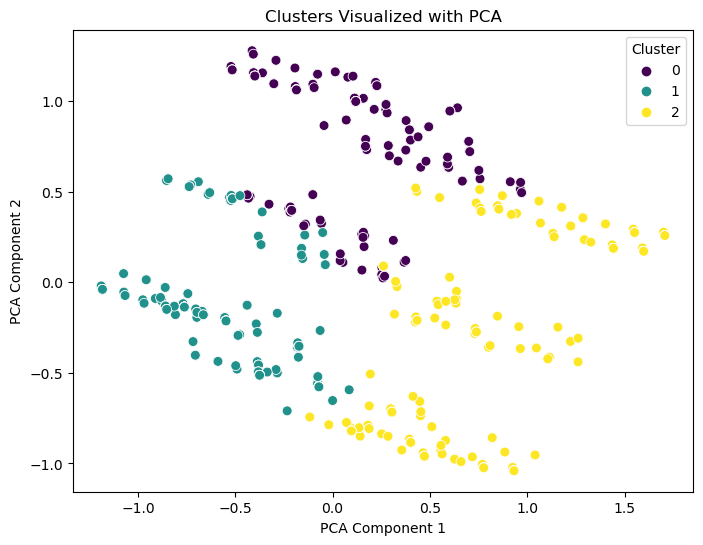

In [16]:
# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [17]:
#Step 6: Analyze Clusters
# Group data by clusters and analyze mean values of attributes
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
Cluster,,,,,,,,,,,,,,,
0,0.813609,0.958580,0.127219,0.905325,0.621302,0.863905,0.100592,0.937870,0.911243,0.207101,0.156805,3.931953,39.952663,2.562130,0.520710
1,0.843042,0.980583,0.088997,0.804207,0.365696,0.962783,0.928803,0.964401,0.017799,0.304207,0.040453,3.796117,43.925566,2.610032,0.402913
2,0.014085,0.782696,0.076459,0.919517,0.661972,0.847082,0.527163,0.046278,0.404427,0.062374,0.553320,6.160966,48.613682,2.724346,0.482897
